In [1]:
import pandas as pd
df = pd.read_csv('sales.csv')

In [2]:
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [4]:
df.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [7]:
df.Influencer.value_counts()

Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: Influencer, dtype: int64

In [8]:
dict = {'Mega':4,'Macro':3,'Micro':2,'Nano':1}

In [9]:
df.Influencer=df.Influencer.map(dict)

In [10]:
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,4,54.732757
1,13.0,9.237765,2.409567,4,46.677897
2,41.0,15.886446,2.913410,4,150.177829
3,83.0,30.020028,6.922304,4,298.246340
4,15.0,8.437408,1.405998,2,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,2,94.685866
4568,71.0,20.610685,6.545573,1,249.101915
4569,44.0,19.800072,5.096192,2,163.631457
4570,71.0,17.534640,1.940873,3,253.610411


In [11]:
import seaborn as sn
import matplotlib.pyplot as plt

(array([239., 204., 269., 207., 260., 224., 257., 222., 273., 185., 234.,
        212., 245., 181., 245., 188., 235., 204., 210., 252.]),
 array([ 10. ,  14.5,  19. ,  23.5,  28. ,  32.5,  37. ,  41.5,  46. ,
         50.5,  55. ,  59.5,  64. ,  68.5,  73. ,  77.5,  82. ,  86.5,
         91. ,  95.5, 100. ]),
 <a list of 20 Patch objects>)

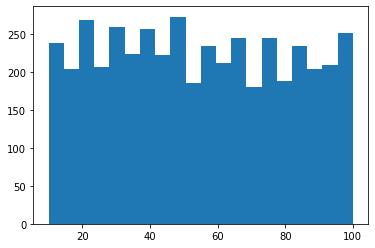

In [12]:
plt.hist(df.TV,bins=20)

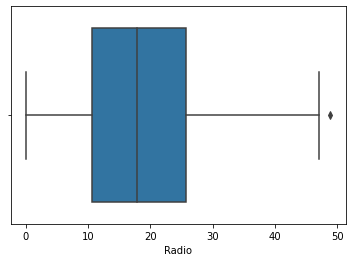

In [13]:
sn.boxplot(df.Radio)

<BarContainer object of 4546 artists>

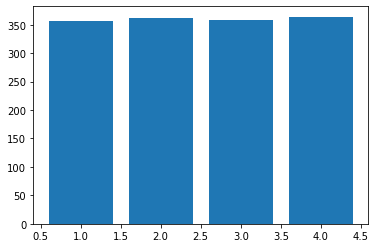

In [14]:
plt.bar(df.Influencer,df.Sales)

In [15]:
x=df.drop('Sales',axis=1)
y=df.Sales

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
x_train.shape

(3636, 4)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(x_test)

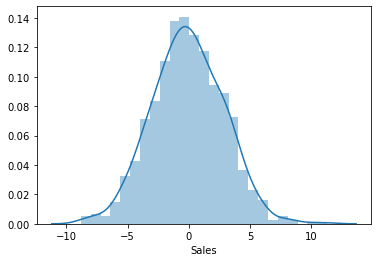

In [22]:
sn.distplot(y_test-y_pred)

In [23]:
lr.score(x_test,y_test)

0.9990014584152245

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [25]:
lr.score(x_train,y_train)

0.9989933105799909

In [26]:
import pickle
file = open('linear_regression_model.pkl','wb')
pickle.dump(lr,file)